<h1><center>IBM Data Science Professional Certificate (Coursera)</center></h1>
<h1><center>Data Science  Capstone Project</center></h1> 
<h1><center>| Final Report | Adelaide Leitao | </center></h1>


## PART I   
### INTRODUCTION, BUSINESS UNDERSTANDING AND PROBLEM  FRAMING



All around the world roads are shared by cars, buses, trucks, motorcycles, pedestrians, animals, taxis, and other travelers. Travelling,  made possible by motor vehicles, supports economic and social development in most of countries, yet each year, vehicles are involved in accidents that are responsible for millions of deaths and injuries.

Accordingly to the World Health Organization report "Global Status Report on Road Safety 2018", each year 1.35 million people are killed on roads around the world die to accidents. This meand that every day  almost 3,700 people are killed globally in road traffic crashes involving vehicles. More than 50% of those killed are pedestrians, motorcyclists  and cyclists. 

Despite measures and specif campaigns deployed by authorities in all of the countries, the impact of accidents continues to be high an thus, it is of paramount importance to understand what are the factors that may serve as explanation to road accidents. 

In many cases, research shows that some of the major uncontrollable factors for accidents are weather, light and road conditions. The motivation for the work is of design some model that could serve to understand what are the predictors of the severity of an accident; if this proves to be possible, then it could serve as a way to drive and manage alerts issued by authorities and that could help prevent the mumber of accidents as well as  mortality rates.

In summary, this work aims to investigate if data available and related to accidents can reveal some patterns and insights that can be used by local government and traffic authorities to understand what are the predictors of the severity of traffic accidents. If so, such model would provide added value for decision-making related with reduction of the number of accidents in a city.



## PART II
### DATA UNDERSTANDING 

In this part, all attributes of the available data are studied in detail. 
The data that is going to be used for this project capstone was made available by the Seattle Police Department and is  related with the Accident Traffic Records Department, collect from 2004 to present.  It consists of a dataset that includes + 190 000 observations and 37 independent variables. The dependent variable is named  “SEVERITYCODE” and  contains a classification corresponding to different levels of severity caused by an accident that accordingly to the metadate given is as follows:
* 3—fatality
* 2b—serious injury
* 2—injury
* 1—prop damage
* 0—unknown


In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set(style="whitegrid")

%matplotlib inline

from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification

print('imported')

imported


In [3]:
seed = 42

In [4]:
# Loading of the dataset
df_data = pd.read_csv("/users/adelaide.leitao/downloads/Data-Collisions.csv")

C:\Users\adelaide.leitao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Understanding the dataset size in terms of observations and columns (variables)
df_data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
# understanding missing  values 
df_data.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

The SEVERITYCODE column contains a codification that corresponds to the severity of the accidentm which is the target variable   


In [7]:
df_data['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


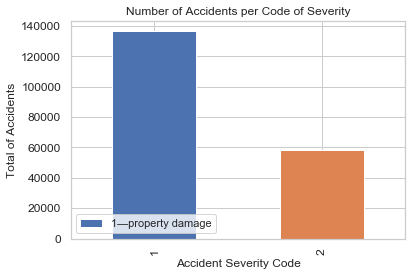

In [8]:
# a bar plot to get a visual understanding of distribution of accidents per severity code
barplot = df_data['SEVERITYCODE'].value_counts().plot(kind='bar', title ="Number of Accidents per Code of Severity" , legend=True, fontsize=12)
barplot.set_xlabel("Accident Severity Code")
barplot.set_ylabel("Total of Accidents" )                                                
barplot.legend(["1—property damage", "2—injury"], loc=3)
plt.show()

Surprisingly, the total of observations are all coded either as "1. property damage" or  "2. injury". The remaining severity codes 
* 3.Fatality
* 2b.Serious Injury
* 0.Unknown

have zero observations. This seemed strange so the column SEVERITYCODE.1  was investigated in order to understand if more detailed information could be present there. However, the result was the same, as shown below:

In [9]:
 df_data['SEVERITYCODE.1'].value_counts().to_frame()         

,SEVERITYCODE.1
1,136485
2,58188



Considering  above column SEVERITYCODE, in terms of sevrity level that  1. property damage is less severe than 2. injury


Understanding the metadata available regarding this dataset, it is possioble to conclude that some features are not possible to be used. For the following two columns  there is no metadata available:


| Name of Column  | Metadata | Total of Missing |
| :- | -: | :-: |
| EXCEPTRSNCODE  | No metadata available | 109862|
| EXCEPTRSNDESC  | No metadata available | 189035|

For the following columns, the volume of missing values is quite high meaning it will not be possible to consider:

| Name of Column  | Metadata | Total of Missing |
| :- | -: | :-: |
| PEDROWNOTGRNT  | Whether or not the pedestrian right of way was not granted | 190006|
| INATTENTIONIND  | Whether or not collision was due to inattention | 164868|



Other columns like the list  below are related with geospatial information that, in the context of this study, can bot be resolved and thus, will not be considered for analysis: 
* OBJECTID 
* INTKEY
* INCKEY
* COLDETKEY
* INTKEY
* SEGLANEKEY
* CROSSWALKKEY
* REPORTNO
 
Also accordingly to the metadata available the following columns correspond to descriptions that, considering  the terms of this problem framing are not much useful:

* SDOT_COLCODE
* SDOTCOLNUM
* LOCATION


Considering the remaining data available, this tudy will be focusing a more reduced number of independent variables related with the **context conditions of the accidents** and thus, the focus will be on investigation and understanding if from those factors area  possibly good  predictors of the level of severity of accidents.
The selected variables are:  

* UNDERINFL, whether or not a driver involved was under the influence of drugs or alcohol
* WEATHER, the weather conditions at the time of the accident
* ROADCOND, the road conditions at the time of the accident
* LIGHTCOND, the light conditions at the time of the accident
* SPEEDING, a classification  whether speeding was a factor in the accident


In [10]:
#creation a new dataset with the mentioned columns  
df_data_new = df_data[['SEVERITYCODE', 'UNDERINFL','WEATHER', 'ROADCOND','LIGHTCOND','SPEEDING']].copy()

In [11]:
df_data_new.head()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,N,Overcast,Wet,Daylight,NaN
1,1,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,0,Overcast,Dry,Daylight,NaN
3,1,N,Clear,Dry,Daylight,NaN
4,2,0,Raining,Wet,Daylight,NaN



The following lines include a **study of  frequencies** for the several features considered in this new dataset.

Starting  with the target variable which is column **SEVERITYCODE**, corresponding  to the severity of the accident and showing  that all observations (eg, accidents) are classified  either in **property damage (1)** or in **injuries (2)**, the latter more severe than the first.

In [12]:
df_data_new['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


The **UNDERINFL feature** classifies collisions based on **whether or not a driver involved was under the influence of drugs or alcohol**. There are 4 different values however metadata information does not specify the meaning of each of the codes. Most probably a pair is used to indicate alcohol influence/no-influence and  another pair is used to indicate drugs influence/no-influence. Same is to say that codes 0 and N will probably be used when a driver was not under any influence and, codes 1 and Y where are used when a drive was under some influence.          

In [13]:
Size= df_data_new['UNDERINFL'].shape[0]
Nulls_Counts = df_data_new['UNDERINFL'].isnull().sum()
print('Variable UNDERINFL Size = {}'.format(Size))
print('Variable UNDERINFL Nulls = {}'.format(Nulls_Counts))

pd.crosstab(index=df_data_new['UNDERINFL'], columns=df_data_new['SEVERITYCODE'], margins=True)


Variable UNDERINFL Size = 194673
Variable UNDERINFL Nulls = 4884


SEVERITYCODE,1,2,All
UNDERINFL,,,
0,57693,22701,80394
1,2372,1623,3995
N,69378,30896,100274
Y,3187,1939,5126
All,132630,57159,189789


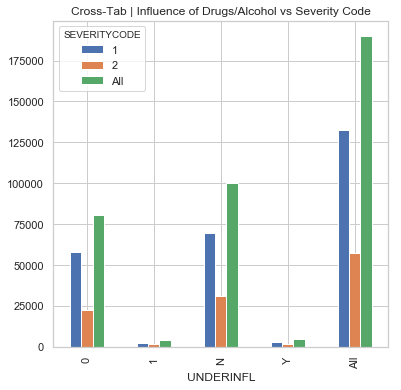

In [14]:
my_tab= pd.crosstab(df_data_new["UNDERINFL"],df_data_new["SEVERITYCODE"], margins = True)
my_tab.plot(kind='bar', figsize = (6,6), title ="Cross-Tab | Influence of Drugs/Alcohol vs Severity Code")

The **WEATHER feature** includes a description of the **weather conditions during at the moment of the accident** and is distributed as follows:

Variable WEATHER Size = 194673
Variable WEATHER Unique Values = 11
Variable WEATHER Nulls = 5081
Variable WEATHER Mode = Clear


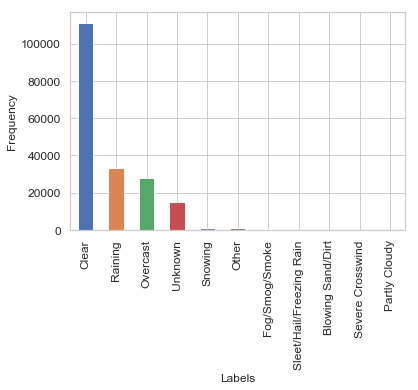

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [15]:
Size= df_data_new['WEATHER'].shape[0]
Unique_Values= (df_data_new[('WEATHER')].nunique())
Labels = df_data_new['WEATHER'].unique()
Nulls_Counts = df_data_new['WEATHER'].isnull().sum()
Mode = df_data_new['WEATHER'].mode()[0]
Value_Counts = df_data_new['WEATHER'].value_counts().head(10)
print('Variable WEATHER Size = {}'.format(Size))
print('Variable WEATHER Unique Values = {}'.format(Unique_Values))
print('Variable WEATHER Nulls = {}'.format(Nulls_Counts))
print('Variable WEATHER Mode = {}'.format(Mode))


barplot = df_data_new['WEATHER'].value_counts().plot(kind='bar',fontsize=12)
barplot.set_xlabel("Labels")
barplot.set_ylabel("Frequency" )                                                
plt.show()


df_data_new['WEATHER'].value_counts().to_frame()


The **ROADCOND feature** describes the condition of the road during the collision as is distributed as follows: 

Variable ROADCOND Size = 194673
Variable ROADCOND Unique Values = 9
Variable ROADCOND Nulls = 5012
Variable ROADCOND Mode = Dry


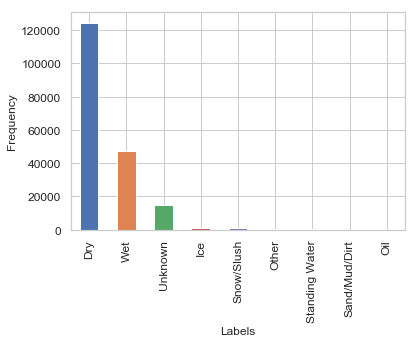

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [16]:
df_data_new['ROADCOND'].value_counts().to_frame()

Size= df_data_new['ROADCOND'].shape[0]
Unique_Values= (df_data_new[('ROADCOND')].nunique())
Labels = df_data_new['ROADCOND'].unique()
Nulls_Counts = df_data_new['ROADCOND'].isnull().sum()
Mode = df_data_new['ROADCOND'].mode()[0]
Value_Counts = df_data_new['ROADCOND'].value_counts().head(10)

print('Variable ROADCOND Size = {}'.format(Size))
print('Variable ROADCOND Unique Values = {}'.format(Unique_Values))
print('Variable ROADCOND Nulls = {}'.format(Nulls_Counts))
print('Variable ROADCOND Mode = {}'.format(Mode))

barplot = df_data_new['ROADCOND'].value_counts().plot(kind='bar',fontsize=12)
barplot.set_xlabel("Labels")
barplot.set_ylabel("Frequency" )                                                
plt.show()


df_data_new['ROADCOND'].value_counts().to_frame()


The **LIGHTCOND feature** refers to the **light conditions on the moment of the accident** and is distributed as follows:


Variable LIGHTCOND Size = 194673
Variable LIGHTCOND Unique Values = 9
Variable LIGHTCOND Nulls = 5170
Variable LIGHTCOND Mode = Daylight


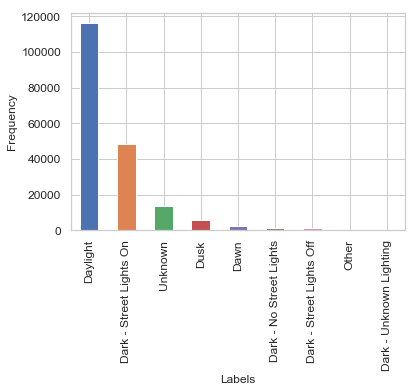

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [17]:
df_data_new['LIGHTCOND'].value_counts().to_frame()

Size= df_data_new['LIGHTCOND'].shape[0]
Unique_Values= (df_data_new[('LIGHTCOND')].nunique())
Labels = df_data_new['LIGHTCOND'].unique()
Nulls_Counts = df_data_new['LIGHTCOND'].isnull().sum()
Mode = df_data_new['LIGHTCOND'].mode()[0]


print('Variable LIGHTCOND Size = {}'.format(Size))
print('Variable LIGHTCOND Unique Values = {}'.format(Unique_Values))
print('Variable LIGHTCOND Nulls = {}'.format(Nulls_Counts))
print('Variable LIGHTCOND Mode = {}'.format(Mode))

barplot = df_data_new['LIGHTCOND'].value_counts().plot(kind='bar',fontsize=12)
barplot.set_xlabel("Labels")
barplot.set_ylabel("Frequency" )                                                
plt.show()


df_data_new['LIGHTCOND'].value_counts().to_frame()


The  **SPEEDING feature** indicates whether or not speeding was a factor in the accident. From the metadata understanding, a **blank** is not a null value but **indicates that the vehicle was not speeding**. The observations have the following distribution:  

In [18]:
Size= df_data_new['SPEEDING'].shape[0]
Blanks = df_data_new['SPEEDING'].isnull().sum()
Speeding = df_data_new['SPEEDING'].value_counts()

print('Variable SPEEDING Size = {}'.format(Size))
print('Variable SPEEDING Blanks (Not Speeding)  = {}'.format(Blanks))
print('Variable SPEEDING YES   = {}'.format(Speeding))


Variable SPEEDING Size = 194673
Variable SPEEDING Blanks (Not Speeding)  = 185340
Variable SPEEDING YES   = Y    9333
Name: SPEEDING, dtype: int64


## PART III 
### DATA PREPARATION 

This section includes the activities required for preparing the final dataset that will be used for modeling. As best practice, with creation a new dataframe to perform the required transformations.

In [19]:
#creation a new dataframe   
df_data_dp = df_data_new[['SEVERITYCODE', 'UNDERINFL','WEATHER', 'ROADCOND','LIGHTCOND','SPEEDING']].copy()
df_data_dp.head()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,N,Overcast,Wet,Daylight,NaN
1,1,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,0,Overcast,Dry,Daylight,NaN
3,1,N,Clear,Dry,Daylight,NaN
4,2,0,Raining,Wet,Daylight,NaN


Starting with **UNDERINFL**, this column will be encoded; values N and 0 (zero) will be converted to 0 (zero= no influence of drugs/alcohol) and values Y and 1 will be converted to 1 (1= under influence of drugs/alcohol)

In [20]:
df_data_dp['UNDERINFL'] = df_data_dp['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})
df_data_dp['UNDERINFL'].value_counts().to_frame()

,UNDERINFL
0.0,180668
1.0,9121


For column **SPEEDING**  blank values will be considered a by negative value 0 (zero = not speeding) and  Y will be replaced by a positive negative 1, meaning there was conditions of speeding by the driver

In [21]:
df_data_dp['SPEEDING'] = df_data_dp['SPEEDING'].map({'Y': 1})
df_data_dp['SPEEDING'].replace(np.nan, 0, inplace=True)
df_data_dp['SPEEDING'].value_counts().to_frame()

,SPEEDING
0.0,185340
1.0,9333


For column **WEATHER**  an encoding will be performed to reduce the number of unique values, from 11 t 5

In [22]:
print('Unique Values = {} \nLabels = \n{}'.format(df_data_dp.WEATHER.nunique(), \
                                                df_data_dp.WEATHER.value_counts() ))


Unique Values = 11 
Labels = 
Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


In [23]:
# manual enconding of some of the unique values in order to have a "compacted" version
# Overcast = Overcast_fog_cloudly
# Fog/Smog/Smoke =  Overcast_fog_cloudly
# PartlyCloudy =  Overcast_fog_cloudly
# Snowing  =  Snowing_Hail 
# Sleet/Hail/Freezing Rain =  Snowing_Hail

df_data_dp['WEATHER'] = df_data_dp['WEATHER'].map({'Clear': 'Clear Weather', 'Raining': 'Raining', 'Overcast': 'Overcast_Fog_Cloudy', 'Unknown': 'Unknown_Other Weather Cond', 'Snowing': 'Snowing_Hail', 'Other': 'Unknown_Other Weather Cond', 'Fog/Smog/Smoke': 'Overcast_Fog_Cloudy', 'Sleet/Hail/Freezing Rain': 'Snowing_Hail', 'Blowing Sand/Dirt': 'Unknown_Other Weather Cond', 'Severe Crosswing' : 'Unknown_Other Weather Cond', 'Partly Cloudy': 'Overcast_Fog_Cloudy'})
df_data_dp['WEATHER'].value_counts().to_frame()

print('Unique Values = {} \nLabels = \n{}'.format(df_data_dp.WEATHER.nunique(), \
                                                df_data_dp.WEATHER.value_counts() ))


Unique Values = 5 
Labels = 
Clear Weather                 111135
Raining                        33145
Overcast_Fog_Cloudy            28288
Unknown_Other Weather Cond     15979
Snowing_Hail                    1020
Name: WEATHER, dtype: int64


For column **ROADCOND**  an encoding will be performed to reduce the number of unique values, from 9 to 3

In [24]:
print('Unique Values = {} \nLabels = \n{}'.format(df_data_dp.ROADCOND.nunique(), \
                                                df_data_dp.ROADCOND.value_counts() ))


Unique Values = 9 
Labels = 
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64


In [25]:
# manual enconding of some of the unique values in order to have a "compacted" version
# normal road conditions  vs  dangerous road conditions

df_data_dp['ROADCOND'] = df_data_dp['ROADCOND'].map({'Dry': 'Normal Road Cond', 'Wet': 'Dangerous Road Cond', 'Unknown': 'Unknown Road Cond', 'Ice': 'Dangerous Road Cond', 'Snow_Slush': 'Dangerous Road Cond','Other': 'Unknown Road Cond', 'Standing Water': 'Dangerous Road Cond', 'Sand/Mud/Dirt': 'Dangerous Road Cond', 'Oil': 'Dangerous Road Cond'})
df_data_dp['ROADCOND'].value_counts().to_frame()

print('Unique Values = {} \nLabels = \n{}'.format(df_data_dp.ROADCOND.nunique(), \
                                                df_data_dp.ROADCOND.value_counts() ))

Unique Values = 3 
Labels = 
Normal Road Cond       124510
Dangerous Road Cond     48937
Unknown Road Cond       15210
Name: ROADCOND, dtype: int64


For column **LIGHTCOND** an encoding will be performed to reduce the number of unique values, from 9 t 5

In [26]:
print('Unique Values = {} \nLabels = \n{}'.format(df_data_dp.LIGHTCOND.nunique(), \
                                                df_data_dp.LIGHTCOND.value_counts() ))


Unique Values = 9 
Labels = 
Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


In [27]:
# manual enconding of some of the unique values in order to have a "compacted" version
# daylight conditions  vs  Low light (dusk_dawn) vs Dark With Lights vs Dark Without Lights 

df_data_dp['LIGHTCOND'] = df_data_dp['LIGHTCOND'].map({'Daylight': 'Daylight', 'Dark - Street Lights On': 'Dark_WithLights', 'Unknown': 'Unknown Light Cond', 'Dusk': 'Dusk_Dawn', 'Dawn': 'Dusk_Dawn','Dark - No Street Lights': 'Dark_NoLights', 'Dark - Street Lights Off': 'Dark_NoLights', 'Other': 'Unknown Light Cond', 'Dark - Unknown Lighting': 'Dark_NoLights'})
df_data_dp['LIGHTCOND'].value_counts().to_frame()

print('Unique Values = {} \nLabels = \n{}'.format(df_data_dp.LIGHTCOND.nunique(), \
                                                df_data_dp.LIGHTCOND.value_counts() ))

Unique Values = 5 
Labels = 
Daylight              116137
Dark_WithLights        48507
Unknown Light Cond     13708
Dusk_Dawn               8404
Dark_NoLights           2747
Name: LIGHTCOND, dtype: int64


**Transformation of the above categorical features WEATHER, ROADCOND and LIGHTCOND into vectors** with "get_dummies" method.

In [28]:
df_data_dp = pd.concat([df_data_dp.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=1), 
           pd.get_dummies(df_data_dp['ROADCOND']),
           pd.get_dummies(df_data_dp['LIGHTCOND']),
           pd.get_dummies(df_data_dp['WEATHER'])], axis=1)

In [29]:
df_data_dp.head()

,SEVERITYCODE,UNDERINFL,SPEEDING,Dangerous Road Cond,Normal Road Cond,Unknown Road Cond,Dark_NoLights,Dark_WithLights,Daylight,Dusk_Dawn,Unknown Light Cond,Clear Weather,Overcast_Fog_Cloudy,Raining,Snowing_Hail,Unknown_Other Weather Cond
0,2,0.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,1,0.0,0.0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,1,0.0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,1,0.0,0.0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,2,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [30]:
# a final search for missing values  
df_data_dp.isnull().sum()

SEVERITYCODE                     0
UNDERINFL                     4884
SPEEDING                         0
Dangerous Road Cond              0
Normal Road Cond                 0
Unknown Road Cond                0
Dark_NoLights                    0
Dark_WithLights                  0
Daylight                         0
Dusk_Dawn                        0
Unknown Light Cond               0
Clear Weather                    0
Overcast_Fog_Cloudy              0
Raining                          0
Snowing_Hail                     0
Unknown_Other Weather Cond       0
dtype: int64

In [31]:
# and dropping the null records for column UNDERINFL,  since is less than 3%
df_data_dp.dropna(axis=0, inplace=True)
df_data_dp.isnull().sum()

SEVERITYCODE                  0
UNDERINFL                     0
SPEEDING                      0
Dangerous Road Cond           0
Normal Road Cond              0
Unknown Road Cond             0
Dark_NoLights                 0
Dark_WithLights               0
Daylight                      0
Dusk_Dawn                     0
Unknown Light Cond            0
Clear Weather                 0
Overcast_Fog_Cloudy           0
Raining                       0
Snowing_Hail                  0
Unknown_Other Weather Cond    0
dtype: int64

In [32]:
df_data_dp.shape

(189789, 16)

As seen before, the data in the dataframe is not balanced.

In [33]:
df_data_dp['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,132630
2,57159


To improve accuracy of preditive modelling, data needs to be balanced between the two categories of accident severity.
It is clear that there is a much larger volume of accidents  involving property damages (code 1) rather than accidents involving injuries (code 2). If the model is trained  with this data it will most probably be biased.
To fix this, data must be resampled and the choosen method is to down-sample the majority class, which means randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

The process will first separate observations from each class into different dataframes; next, the majority class is resampled  without replacement (eg, setting the number of observations to match the minority class); a final combination of the down-sampled majority class dataframe with the original minority class dataframe.

In [34]:
# Separate the majority and minority classes
df_minority = df_data_dp[df_data_dp['SEVERITYCODE']==2]
df_majority = df_data_dp[df_data_dp['SEVERITYCODE']==1]

# Downsampling the majority class  to an equal  number of observations in the minority class

df_majority = df_majority.sample(len(df_minority), random_state=0)

# Concatenation of the majority and minority dataframes
df_BBB = pd.concat([df_majority,df_minority])

# Shuffle the dataset to prevent the model from getting biased by similar samples
df_BBB = df_BBB.sample(frac=1, random_state=0)


The process has produced a balanced dataframe as shown below:

In [35]:
df_BBB['SEVERITYCODE'].value_counts().to_frame()


,SEVERITYCODE
2,57159
1,57159


**Correlation** is a common statistical technique used to understand whether and how pairs of variables are related helping to  better understand  available data. In the heatmap below shows, by using Pearson correlation, what features have a strong positive or negative correlation; as is possible to see, most of the variables have weak or no correlation at all

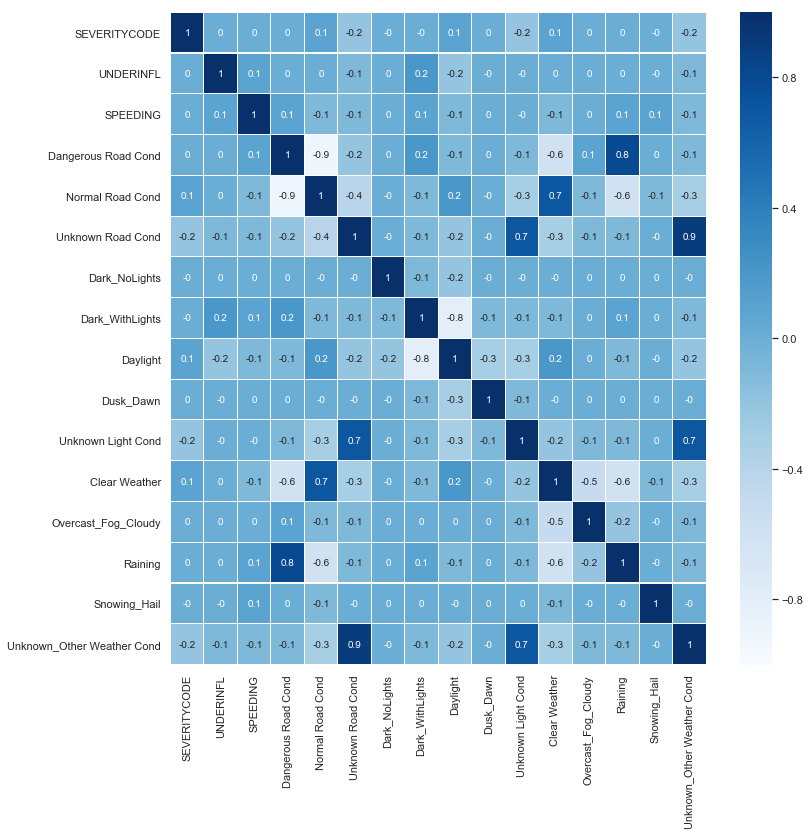

In [36]:
# Finding most correlated features with the target variable using Pearson correlation coefficent
plt.subplots(figsize=(12,12))
sns.heatmap(df_BBB.corr(method='pearson').round(1), annot=True, vmin=-1., cmap='Blues', linewidths=.1)


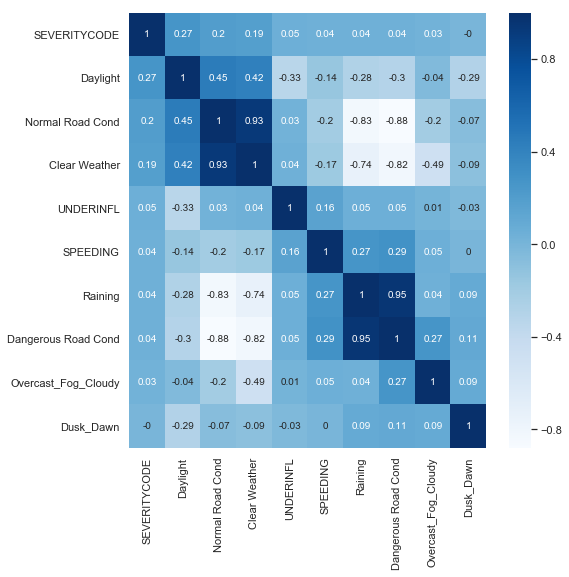

In [37]:
# the image above is difficult to read, so let's look at the top 10 correlation pairs

k = 10 #top 10 
corr_top10 = df_BBB.corr(method='pearson')

plt.figure(figsize =(8,8))
colunas = corr_top10.nlargest(k, 'SEVERITYCODE')['SEVERITYCODE'].index
matriz = np.corrcoef(corr_top10[colunas].values.T)
sns.heatmap(matriz.round(2), annot=True, cmap = 'Blues', yticklabels=colunas.values, xticklabels=colunas.values)
plt.show()

It is easier to understand what the available data tells: there is some considerable correlation between ROAD CONDITIONS,  WEATHER CONDITIONS and LIGHT CONDITIONS. However, variables related with SPEEDING and/or ALCOHOL/DRUGS INFLUENCE do not present significant correlation with the accident severity. In this line, dataframe will be submitted to modelling without those latter variables mentioned.

## PART IV
### MODELLING AND RESULTS 

The objective of this study is predict the severity of an accident based on
1. weather conditions
2. road conditions
3. light conditions


In order to do so several models will be used and all of the above input variables will be used regardless of the correlation previoulsy found. The dataset X will be use as train and Y as test. 

In [38]:
#creation a new dataframe   
df_BBB.drop(['SPEEDING', 'UNDERINFL'], axis=1, inplace=True)
df_BBB.head()

,SEVERITYCODE,Dangerous Road Cond,Normal Road Cond,Unknown Road Cond,Dark_NoLights,Dark_WithLights,Daylight,Dusk_Dawn,Unknown Light Cond,Clear Weather,Overcast_Fog_Cloudy,Raining,Snowing_Hail,Unknown_Other Weather Cond
3542,2,1,0,0,0,0,0,1,0,0,0,1,0,0
55833,1,0,0,1,0,0,1,0,0,0,0,0,0,1
28897,1,0,1,0,0,0,1,0,0,1,0,0,0,0
116121,1,1,0,0,0,0,1,0,0,1,0,0,0,0
150123,2,1,0,0,0,1,0,0,0,1,0,0,0,0


In [39]:
#split of dataset  
train_set, test_set = train_test_split(df_BBB, test_size = 0.2, random_state = seed)

In [40]:
Xdf_BBB_train = train_set.drop(['SEVERITYCODE'], axis = 'columns')
Ydf_BBB_train = train_set['SEVERITYCODE']

Xdf_BBB_test = test_set.drop(['SEVERITYCODE'], axis = 1)
Ydf_BBB_test = test_set['SEVERITYCODE']

In [41]:
scaler = MinMaxScaler()

features_names = Xdf_BBB_train.columns

Xdf_BBB_train = scaler.fit_transform(Xdf_BBB_train)
Xdf_BBB_train = pd.DataFrame(Xdf_BBB_train, columns = features_names)

Xdf_BBB_test = scaler.transform(Xdf_BBB_test)
Xdf_BBB_test = pd.DataFrame(Xdf_BBB_test, columns = features_names)

C:\Users\adelaide.leitao\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


**Logistic Regression**

Logistic Regression is a classifier that estimates discrete values based on a set of independent variables; it predicts the probability of occurrence of an event by fitting data to a logistic function and the obtained values are situated within 0 and 1 since the model predicts a probability.

In [42]:
#training the model
LogRegModel = LogisticRegression(C=0.01, random_state = seed, solver = 'lbfgs', max_iter = 500)
LogRegModel.fit(Xdf_BBB_train, Ydf_BBB_train)
LogRegModel

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

----- Logistic Regression F1 Score  --------------
0.5386172957741423
----- Logistic Regression Acurracy  --------------
0.563593421973408
----- Classification Report --------------
              precision    recall  f1-score   support

           1       0.63      0.33      0.43     11547
           2       0.54      0.80      0.64     11317

   micro avg       0.56      0.56      0.56     22864
   macro avg       0.58      0.57      0.54     22864
weighted avg       0.58      0.56      0.54     22864

----- Confusion Matrix Results --------------
[[3837 7710]
 [2268 9049]]
---- Visual Confusion Matrix ---------------------


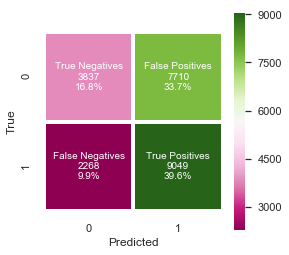

In [45]:
#making predictions
predicted = LogRegModel.predict(Xdf_BBB_test)

#printing results
LogRegModel_f1 = f1_score(Ydf_BBB_test, predicted, average='weighted')
LogRegModel_acc = accuracy_score(Ydf_BBB_test, predicted)
LogRegModel_cm = confusion_matrix(Ydf_BBB_test, predicted)

print('----- Logistic Regression F1 Score  --------------'); print(LogRegModel_f1)

print('----- Logistic Regression Acurracy  --------------'); print(LogRegModel_acc)

Report = (classification_report(Ydf_BBB_test, predicted))
print('----- Classification Report --------------'); print(Report)

print('----- Confusion Matrix Results --------------'); print(LogRegModel_cm) 

print('---- Visual Confusion Matrix ---------------------')
with plt.style.context('seaborn'): 
    plt.figure(figsize=(4, 4))
    group_names = ['True Negatives','False Positives','False Negatives','True Positives']
    group_counts = ["{0:0.0f}".format(value) for value in
                LogRegModel_cm.flatten()]
    group_percentages = ["{0:.1%}".format(value) for value in
                     LogRegModel_cm.flatten()/np.sum(LogRegModel_cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.set(font_scale=1)
    sns.heatmap(LogRegModel_cm, annot=labels, square=True, fmt='',annot_kws={"size":10},linewidth=3, cmap='PiYG')
    plt.xlabel('Predicted'); plt.ylabel('True')
    plt.show()
    
    

**Decision Tree**

Decision Tree is a  tree-like model that splits the sample into two or more homogenous sets (leaves) based on the most significant differentiators in the input variables. To choose a differentiator (predictor) the algorithm considers all features and makes a  binary split on them (for categorical data, split by category; for continuous, picks a cut-off threshold). It will then choose the one with the least cost (eg, highest accuracy), and repeats recursively  until it successfully splits the data in all leaves (or reaches the maximum depth). Information gain for a decision tree classifier can be calculated either using the Gini Index measure or the Entropy measure, whichever gives a greater gain.

In [46]:
#training the model
DecTreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
DecTreeModel.fit(Xdf_BBB_train, Ydf_BBB_train)
DecTreeModel

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

----- Decision Tree F1 Score  --------------
0.5456403589310034
----- Decision Tree Acurracy  --------------
0.5616252624212736
----- Classification Report --------------
              precision    recall  f1-score   support

           1       0.61      0.38      0.46     11547
           2       0.54      0.75      0.63     11317

   micro avg       0.56      0.56      0.56     22864
   macro avg       0.57      0.56      0.55     22864
weighted avg       0.57      0.56      0.55     22864

----- Confusion Matrix Results --------------
[[4331 7216]
 [2807 8510]]
---- Visual Confusion Matrix ---------------------


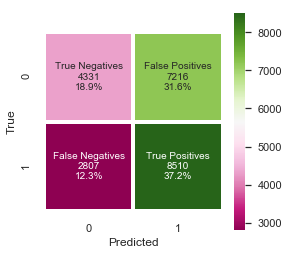

In [47]:
#making predictions
predicted = DecTreeModel.predict(Xdf_BBB_test)

#printing results
DecTreeModel_f1 = f1_score(Ydf_BBB_test, predicted, average='weighted')
DecTreeModel_acc = accuracy_score(Ydf_BBB_test, predicted)
DecTreeModel_cm = confusion_matrix(Ydf_BBB_test, predicted)

print('----- Decision Tree F1 Score  --------------'); print(DecTreeModel_f1)

print('----- Decision Tree Acurracy  --------------'); print(DecTreeModel_acc)

Report = (classification_report(Ydf_BBB_test, predicted))
print('----- Classification Report --------------'); print(Report)

print('----- Confusion Matrix Results --------------'); print(DecTreeModel_cm) 

print('---- Visual Confusion Matrix ---------------------')
with plt.style.context('seaborn'): 
    plt.figure(figsize=(4, 4))
    group_names = ['True Negatives','False Positives','False Negatives','True Positives']
    group_counts = ["{0:0.0f}".format(value) for value in
                DecTreeModel_cm.flatten()]
    group_percentages = ["{0:.1%}".format(value) for value in
                     DecTreeModel_cm.flatten()/np.sum(DecTreeModel_cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.set(font_scale=1)
    sns.heatmap(DecTreeModel_cm, annot=labels, square=True, fmt='',annot_kws={"size":10},linewidth=3, cmap='PiYG')
    plt.xlabel('Predicted'); plt.ylabel('True')
    plt.show()
    

**Random Forest** 

Random Forest is an ensemble algorithm (eg, it combines more than one algorithms of same or different kind) for classifying objects with a tree-based learning algorithm. This is the same to say that Random Forest is a set of decision trees from randomly selected subset of training set; it aggregates the votes from different decision trees to decide the final class of the test object. The model requires an input to specify a measure that will be  used for classification, along with a value for the number of estimators (number of decision trees).

In [48]:
#training the model
RandomForestModel = RandomForestClassifier(n_estimators=50)
RandomForestModel.fit(Xdf_BBB_train, Ydf_BBB_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

----- Random Forest F1 Score  --------------
0.5350844641517183
----- Random Forest Acurracy  --------------
0.5628061581525542
----- Classification Report --------------
              precision    recall  f1-score   support

           1       0.63      0.32      0.43     11547
           2       0.54      0.81      0.65     11317

   micro avg       0.56      0.56      0.56     22864
   macro avg       0.59      0.57      0.54     22864
weighted avg       0.59      0.56      0.54     22864

----- Confusion Matrix Results --------------
[[3696 7851]
 [2145 9172]]
---- Visual Confusion Matrix ---------------------


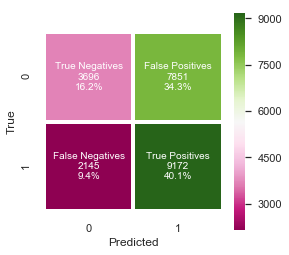

In [49]:
#making prediction 
predicted = RandomForestModel.predict(Xdf_BBB_test)

#printing results
RandomForestModel_f1 = f1_score(Ydf_BBB_test, predicted, average='weighted')
RandomForestModel_acc = accuracy_score(Ydf_BBB_test, predicted)
RandomForestModel_cm = confusion_matrix(Ydf_BBB_test, predicted)

print('----- Random Forest F1 Score  --------------'); print(RandomForestModel_f1)

print('----- Random Forest Acurracy  --------------'); print(RandomForestModel_acc)

Report = (classification_report(Ydf_BBB_test, predicted))
print('----- Classification Report --------------'); print(Report)

print('----- Confusion Matrix Results --------------'); print(RandomForestModel_cm) 

print('---- Visual Confusion Matrix ---------------------')
with plt.style.context('seaborn'): 
    plt.figure(figsize=(4, 4))
    group_names = ['True Negatives','False Positives','False Negatives','True Positives']
    group_counts = ["{0:0.0f}".format(value) for value in
                RandomForestModel_cm.flatten()]
    group_percentages = ["{0:.1%}".format(value) for value in
                     RandomForestModel_cm.flatten()/np.sum(RandomForestModel_cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.set(font_scale=1)
    sns.heatmap(RandomForestModel_cm, annot=labels, square=True, fmt='',annot_kws={"size":10},linewidth=3, cmap='PiYG')
    plt.xlabel('Predicted'); plt.ylabel('True')
    plt.show()
    

**KNN**

The K-nearest neighbors (KNN) algorithm uses ‘similarity’ to predict the values of new datapoints which means that the new data point will be assigned a value based on how closely it matches the points in the training set. KNN is a non-parametric algorithm meaning that does not make any assumptions upon the available data. Is called a "lazy learner" algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset. It is required to define the number of neighbors.

In [50]:
#training the model 
KNNModel = KNeighborsClassifier(n_neighbors = 4).fit(Xdf_BBB_train, Ydf_BBB_train)

----- KNN F1 Score  --------------
0.5413264490005117
----- KNN Acurracy  --------------
0.5421623512946117
----- Classification Report --------------
              precision    recall  f1-score   support

           1       0.55      0.50      0.52     11547
           2       0.53      0.59      0.56     11317

   micro avg       0.54      0.54      0.54     22864
   macro avg       0.54      0.54      0.54     22864
weighted avg       0.54      0.54      0.54     22864

----- Confusion Matrix Results --------------
[[5764 5783]
 [4685 6632]]
---- Visual Confusion Matrix ---------------------


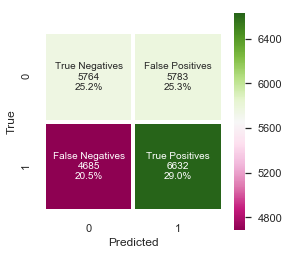

In [51]:
#making predictions  
predicted = KNNModel.predict(Xdf_BBB_test)

#printing results
KNNModel_f1 = f1_score(Ydf_BBB_test, predicted, average='weighted')
KNNModel_acc = accuracy_score(Ydf_BBB_test, predicted)
KNNModel_cm = confusion_matrix(Ydf_BBB_test, predicted)

print('----- KNN F1 Score  --------------'); print(KNNModel_f1)

print('----- KNN Acurracy  --------------'); print(KNNModel_acc)

Report = (classification_report(Ydf_BBB_test, predicted))
print('----- Classification Report --------------'); print(Report)


print('----- Confusion Matrix Results --------------'); print(KNNModel_cm) 

print('---- Visual Confusion Matrix ---------------------')
with plt.style.context('seaborn'): 
    plt.figure(figsize=(4, 4))
    group_names = ['True Negatives','False Positives','False Negatives','True Positives']
    group_counts = ["{0:0.0f}".format(value) for value in
                KNNModel_cm.flatten()]
    group_percentages = ["{0:.1%}".format(value) for value in
                     KNNModel_cm.flatten()/np.sum(KNNModel_cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.set(font_scale=1)
    sns.heatmap(KNNModel_cm, annot=labels, square=True, fmt='',annot_kws={"size":10},linewidth=3, cmap='PiYG')
    plt.xlabel('Predicted'); plt.ylabel('True')
    plt.show()
    


**SVM**

Support Vector Machine(SVM) often offers higher accuracy when compared to other classifiers such as Logistic Regression and  Decision Trees. It is an exciting algorithm and its classifier separates data points using a hyperplane with the largest amount of margin and this is why SVM classifier is also known as a "discriminative classifier". SVM finds an optimal hyperplane which helps in classifying new data points and is appreciatted also for its kernel capabilities to handle nonlinear input spaces. 

In [52]:
#training the model 
SVMModel = SVC(kernel='linear')
SVMModel.fit(Xdf_BBB_train, Ydf_BBB_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

----- SVM F1 Score  --------------
0.46662386430508745
----- SVM Acurracy  --------------
0.5546710986703989
----- Classification Report --------------
              precision    recall  f1-score   support

           1       0.82      0.15      0.26     11547
           2       0.53      0.97      0.68     11317

   micro avg       0.55      0.55      0.55     22864
   macro avg       0.67      0.56      0.47     22864
weighted avg       0.68      0.55      0.47     22864

----- Confusion Matrix Results --------------
[[ 1744  9803]
 [  379 10938]]
---- Visual Confusion Matrix ---------------------


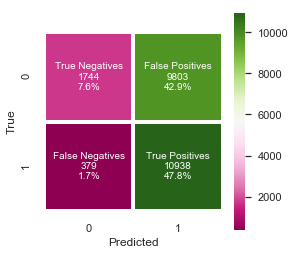

In [53]:
#making predictions  
predicted = SVMModel.predict(Xdf_BBB_test)

#printing results
SVMModel_f1 = f1_score(Ydf_BBB_test, predicted, average='weighted')
SVMModel_acc = accuracy_score(Ydf_BBB_test, predicted)
SVMModel_cm = confusion_matrix(Ydf_BBB_test, predicted)


print('----- SVM F1 Score  --------------'); print(SVMModel_f1)

print('----- SVM Acurracy  --------------'); print(SVMModel_acc)

Report = (classification_report(Ydf_BBB_test, predicted))
print('----- Classification Report --------------'); print(Report)


print('----- Confusion Matrix Results --------------'); print(SVMModel_cm) 

print('---- Visual Confusion Matrix ---------------------')
with plt.style.context('seaborn'): 
    plt.figure(figsize=(4, 4))
    group_names = ['True Negatives','False Positives','False Negatives','True Positives']
    group_counts = ["{0:0.0f}".format(value) for value in
                SVMModel_cm.flatten()]
    group_percentages = ["{0:.1%}".format(value) for value in
                     SVMModel_cm.flatten()/np.sum(SVMModel_cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.set(font_scale=1)
    sns.heatmap(SVMModel_cm, annot=labels, square=True, fmt='',annot_kws={"size":10},linewidth=3, cmap='PiYG')
    plt.xlabel('Predicted'); plt.ylabel('True')
    plt.show()
    


**MLP**

MLP stands for Multi-Layer Perceptron which in the name itself connects to a Neural Network, meaning it relies on an underlying Neural Network to perform the task of classification. A MLP classifier is a logistic regressor where instead of feeding the input to the logistic regression, the input is inserted to a intermediate layer, called the hidden layer, that has a nonlinear activation function.

In [54]:
#training the model
MLPModel = MLPClassifier(hidden_layer_sizes=(150,100,50), solver ='adam', random_state = 1, max_iter = 300, activation = 'relu')
MLPModel.fit(Xdf_BBB_train, Ydf_BBB_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

----- MLP F1 Score  --------------
0.5414707344047488
----- MLP Acurracy  --------------
0.5645993701889434
----- Classification Report --------------
              precision    recall  f1-score   support

           1       0.63      0.34      0.44     11547
           2       0.54      0.79      0.64     11317

   micro avg       0.56      0.56      0.56     22864
   macro avg       0.58      0.57      0.54     22864
weighted avg       0.58      0.56      0.54     22864

----- Confusion Matrix Results --------------
[[3941 7606]
 [2349 8968]]
---- Visual Confusion Matrix ---------------------


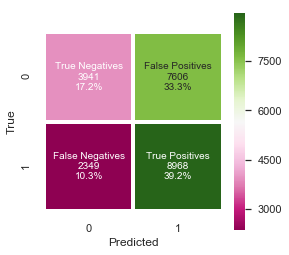

In [55]:
#making predictions 
predicted  = MLPModel.predict(Xdf_BBB_test)


#printing results
MLPModel_f1 = f1_score(Ydf_BBB_test, predicted, average='weighted')
MLPModel_acc = accuracy_score(Ydf_BBB_test, predicted)
MLPModel_cm = confusion_matrix(Ydf_BBB_test, predicted)

print('----- MLP F1 Score  --------------'); print(MLPModel_f1)

print('----- MLP Acurracy  --------------'); print(MLPModel_acc)

Report = (classification_report(Ydf_BBB_test, predicted))
print('----- Classification Report --------------'); print(Report)


print('----- Confusion Matrix Results --------------'); print(MLPModel_cm) 

print('---- Visual Confusion Matrix ---------------------')
with plt.style.context('seaborn'): 
    plt.figure(figsize=(4, 4))
    group_names = ['True Negatives','False Positives','False Negatives','True Positives']
    group_counts = ["{0:0.0f}".format(value) for value in
                MLPModel_cm.flatten()]
    group_percentages = ["{0:.1%}".format(value) for value in
                     MLPModel_cm.flatten()/np.sum(MLPModel_cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.set(font_scale=1)
    sns.heatmap(MLPModel_cm, annot=labels, square=True, fmt='',annot_kws={"size":10},linewidth=3, cmap='PiYG')
    plt.xlabel('Predicted'); plt.ylabel('True')
    plt.show()
    




## PART V
### EVALUATION
The dataset prepared for the study was subject to six models;
* Logistic Regression
* Decision Tree
* Random Forest 
* KNN
* SVM 
* ML

The main  metrics used to understandand and evaluate the results of the  models are
* **F1 Score** which is the harmonic meean between precision and recall; it reanges between o and 1 - the greater the F1 Score the the better is the performance of the model

* **Accuracy**, which is the ratio between correct predictions divided by the total number of input sample, very useful when equal number of samples belonging to each class.

The individual classification reports printed in the previous section also provided:
* True Positive Rate (Sensitivity/Recall): defined as TP/(FN+TP) and corresponding to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points
* False Positive Rate (Specificity): defined as FP/(FP+TN) and corresponding to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points


In [56]:
results = {
    "Model": ["Log Regression", "Decision Tree", "Random Forest", "KNN",  "SVM", "ML Percepton"],
    "F1 Score": [LogRegModel_f1, DecTreeModel_f1, RandomForestModel_f1, KNNModel_f1, SVMModel_f1, MLPModel_f1],
    "Accuracy": [LogRegModel_acc, DecTreeModel_acc, RandomForestModel_acc, KNNModel_acc, SVMModel_acc, MLPModel_acc],
}

results = pd.DataFrame(results)
results


,Model,F1 Score,Accuracy
0,Log Regression,0.538617,0.563593
1,Decision Tree,0.545640,0.561625
2,Random Forest,0.535084,0.562806
3,KNN,0.541326,0.542162
4,SVM,0.466624,0.554671
5,ML Percepton,0.541471,0.564599


Metrics above show that results from the several models are very much similar.The highest F1 Score is produced by Decision Tree however, to keep evaluation concepts as simples as possible, this work considersthe **best accuracy** which is  delivered  by **MLP** and with almost the same numbers as **Logistic Regression**. 

Regarding **MLP**, there is not method in Scikit-Learn to obtain MLP feature importance and this has been the "classic problem" of interpreting how ML models weights contribute towards classification decisions. Some Python libraries are aiming to address this problem such as LIME, ELI5 and Yellowbrick, however there is no simple way for diagnosing and understanding feature importance of a MLP classifier. 

In that line and since the accuracy delivered by the MLP classifier is basically the same as the accuracy delivered by **Logistic Regression**, the latter will be the base for explaining results and evaluation.  

In [57]:
print('----- Logistic Regression Acurracy / Score  --------------'); print(LogRegModel_acc)


----- Logistic Regression Acurracy / Score  --------------
0.563593421973408


In [58]:
LogRegModel.intercept_

array([-0.65605266])

In [59]:
LogRegModel.coef_

array([[ 0.34355206,  0.31880304, -0.53629872, -0.08974724,  0.17751412,
         0.34181174,  0.30122059, -0.77444801,  0.15563897,  0.12777603,
         0.23344405, -0.14109839, -0.47320076]])

In [62]:
coefs = pd.DataFrame( LogRegModel.coef_[0] ,index = Xdf_BBB_train.columns, columns = ['Coef'])
coefs.sort_values(by = 'Coef', ascending = False)


,Coef
Dangerous Road Cond,0.343552
Daylight,0.341812
Normal Road Cond,0.318803
Dusk_Dawn,0.301221
Raining,0.233444
Dark_WithLights,0.177514
Clear Weather,0.155639
Overcast_Fog_Cloudy,0.127776
Dark_NoLights,-0.089747
Snowing_Hail,-0.141098


A positive LR coef means that all else being equal, the presence of that feature is more likely to impact on severity than its non-presence.  If the sign is negative, the interpretation is that all else being equal, the presence of that feature is less likely to impact the severity then its non-presence.

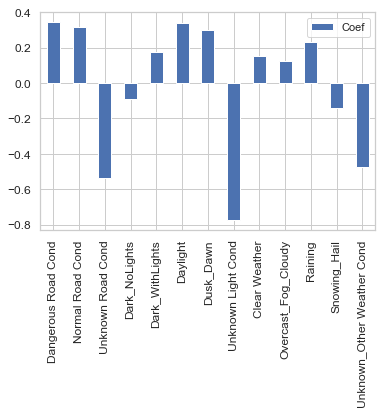

In [98]:
barplot = coefs.plot(kind='bar', legend=True, fontsize=12)
plt.show()



## PART VI
### CONCLUSION

The number of traffic accidents and their victims demands for global attention due to its impact on society. The ability to predict traffic accident severity is of most importance for public safety and may have a crucial role especially if supported by the capacity of a timely recognition of the key influencers and its role as predictors.

After understanding the available data and features, this study used several machine learning model for the classification of the level of severity of injuries, using the datasource provided by the Seattle city in the USA.  Well-known classification methods like logistic regression, decision tree, random forest were used, alongside with KNN, SVM and neural network classifiers such as MLP in order to generate the classification models. 

Each model was trained and tested, and the experimental results show an interesting classification accuracy that allows to point that, based on historical data related to specific classes, it is possible to conclude that particular weather, road, light conditions have a somewhat impact on whether or not could result in different levels severity of namely concerning  property damage (class 1) or injuries (class 2).

However, there is considerable space for improvement: different factors involved in traffic accidents have a substantial effect on each other, thus making it difficult to individually consider any of the available parameters when explaining the
severity of traffic accidents. In this line, the findings of this study are based on data available in only one source, which is the ArcGIS Metadata Form, probably build with a more specific focus of georeferenciation of accidents and not with the focus of gathering all accident related data, features and classes. This, the fact that this was the only datasource available, makes the study very narrowed and limited in the number of variables, creating space for a much broader studythat could model (and comprehend) the relationship between the accident injury severity and many many contributing factors arising from human characteristics, vehicle characteristics, roadway characteristics, weather characteristics and other environmental characteristics.

Thank you!

A project by Adelaide Leitao (adelaide.leitao@gmail.com).
October 15, 2020